In this exercise, you will continue your analysis of the Lorenz system using the results from Exercise 3.2 (phase space representation and reconstruction of the Lorenz attractor).

# 1
Compute the correlation sum C2 for both the original Lorenz system and the reconstructed (embedded) time series. Note that both systems are multi-dimensional. Choose different values of ε. Specifically, create a list of 100 logarithmically spaced ε values using np.logspace(), ensuring that all relevant scales are covered. Plot the ε values against the corresponding correlation sums and explain the observed behaviour across different scales.
Hint: You can use the function scipy.spatial.distance.pdist() to obtain all pairwise distances of the data set. (5P)



In [2]:
import os
os.chdir("/Users/kim-wonjin/Documents/CLEWS/Python/Nonlinear/hw3")
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib widget

In [22]:
def embed(x: np.ndarray, m: int, tau: int) -> np.ndarray:
    """Embeds a scalar time series in m dimensions with time delay tau.

    Parameters
    ----------
    x : np.ndarray
        The scalar time series
    m : int
        Embedding dimmension
    tau : int
        Time delay

    Returns
    -------
    np.ndarray
        The embedded mutli dimensional time series.
    """
    
    n = len(x)
    k = n - (m - 1) * tau
    z = np.zeros((k, m), dtype="float")
    for i in range(k):
        z[i] = [x[i + j * tau] for j in range(m)]

    return np.stack(z)

In [3]:
dat = np.loadtxt('lorenz_data.dat')
print(dat.shape)

(3, 4000)


In [16]:
x = dat[0]
tau = 17
m = 3
embedded = embed(x, m, tau)

(7998000,)


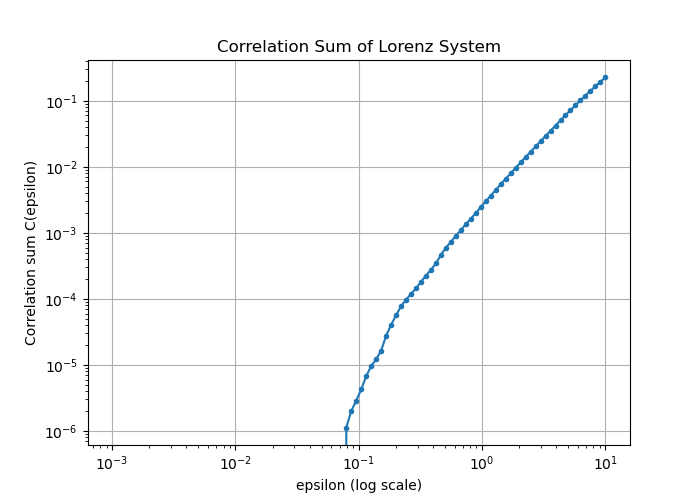

In [29]:
from scipy.spatial.distance import pdist, squareform
eps = np.logspace(-3, 1, 100)
distance = pdist(dat.T)
print(distance.shape)

def correlation_sum(distances, eps_values):
    C = []
    for eps in eps_values:
        C.append(np.mean(distances < eps))
    return np.array(C)

C_lorenz = correlation_sum(distance, eps)
plt.figure(figsize=(7,5))
plt.loglog(eps, C_lorenz, marker='o', markersize=3)
plt.xlabel("epsilon (log scale)")
plt.ylabel("Correlation sum C(epsilon)")
plt.title("Correlation Sum of Lorenz System")
plt.grid(True)
plt.show()

(7862595,)


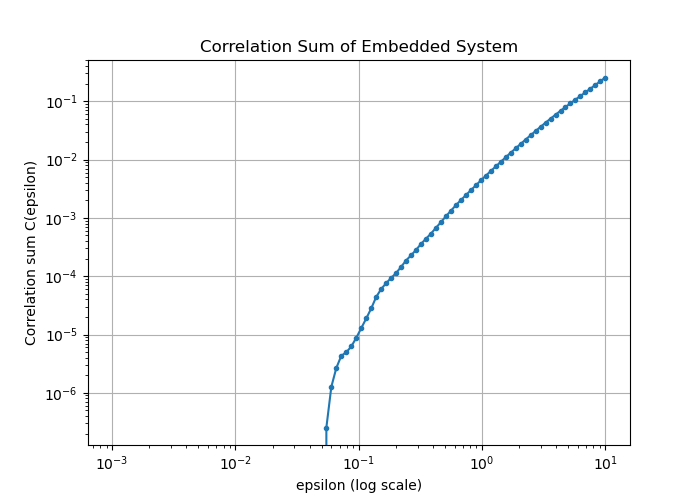

In [30]:
distance2 = pdist(embedded)
print(distance2.shape)

C_embedded = correlation_sum(distance2, eps)
plt.figure(figsize=(7,5))
plt.loglog(eps, C_embedded, marker='o', markersize=3)
plt.xlabel("epsilon (log scale)")
plt.ylabel("Correlation sum C(epsilon)")
plt.title("Correlation Sum of Embedded System")
plt.grid(True)
plt.show()

Both Lorenz system and embedded system, For intermediate ε values, C(ε) shows a power-law behaviour, seen as a straight line in the log–log plot. The slope of this straight line is exactly the correlation dimension.

# 2
Compute the correlation dimension from the correlation sums for both the original and the embedded system. This corresponds to the slope of the line when plotting log(C2) versus log(ε). Use np.polyfit() to determine this slope. Select only the scaling region of the graph and discuss your results for the two different estimates. (5P)

In [34]:
log_eps = np.log(eps)
log_C_lorenz = np.log(C_lorenz)
log_C_emb = np.log(C_embedded)

mask = (eps >= 1e-1) & (eps <= 1e1)
slope_lorenz, intercept_lorenz = np.polyfit(log_eps[mask], log_C_lorenz[mask], 1)
slope_embedded,  intercept_embedded  = np.polyfit(log_eps[mask], log_C_emb[mask], 1)


print("Correlation Dimension of original Lorenz System :", slope_lorenz)
print("Correlation Dimension of Embedded Lorenz System :", slope_embedded)

Correlation Dimension of original Lorenz System : 2.2710627459125514
Correlation Dimension of Embedded Lorenz System : 2.0802248158222856


/var/folders/jf/2nccqn9j6_74h5ldq21d0y2r0000gn/T/ipykernel_33846/2893717205.py:2: RuntimeWarning: divide by zero encountered in log
  log_C_lorenz = np.log(C_lorenz)
/var/folders/jf/2nccqn9j6_74h5ldq21d0y2r0000gn/T/ipykernel_33846/2893717205.py:3: RuntimeWarning: divide by zero encountered in log
  log_C_emb = np.log(C_embedded)


The original Lorenz system gives a correlation dimension of about 2.27, while the embedded system gives about 2.08.
The small difference comes from the reconstruction, and the embedded attractor uses only the x-series and cannot fully reproduce all details of the original 3-dimensional system.